# Import and clean data

In [35]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

%matplotlib inline

import clean 

In [36]:
draft = [
'nfl-combine/2000Offense.csv',
'nfl-combine/2000Defense.csv',
'nfl-combine/2001Defense.csv',
'nfl-combine/2001Offense.csv',
'nfl-combine/2002Defense.csv',
'nfl-combine/2002Offense.csv',
'nfl-combine/2003Defense.csv',
'nfl-combine/2003Offense.csv',
'nfl-combine/2004Offense.csv',
'nfl-combine/2005Defense.csv',
'nfl-combine/2005Offense.csv',
'nfl-combine/2006Defense.csv',
'nfl-combine/2006Offense.csv',
'nfl-combine/2007Defense.csv',
'nfl-combine/2007Offense.csv',
'nfl-combine/2008Defense.csv',
'nfl-combine/2008Offense.csv',
'nfl-combine/2009Defense.csv',
'nfl-combine/2009Offense.csv',
'nfl-combine/2010Defense.csv',
'nfl-combine/2010Offense.csv',
'nfl-combine/2011Defense.csv',
'nfl-combine/2011Offense.csv',
'nfl-combine/2012Defense.csv',
'nfl-combine/2012Offense.csv',
'nfl-combine/2013Defense.csv',
'nfl-combine/2013Offense.csv',
'nfl-combine/2014Defense.csv',
'nfl-combine/2014Offense.csv',
'nfl-combine/2015Defense.csv',
'nfl-combine/2015Offense.csv',
'nfl-combine/2016Defense.csv',
'nfl-combine/2016Offense.csv',
'nfl-combine/2017Defense.csv',
'nfl-combine/2017Offense.csv']

In [37]:
df = clean.read_and_concat(draft)

In [38]:
df = clean.clean_data(df)

In [39]:
df.shape

(5643, 10)

In [40]:
tests = ['Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone', 'Shuttle']
timed = ['Forty', 'Cone', 'Shuttle']
reps = ['BenchReps']
dist = ['Vertical', 'Broad_Jump']

In [41]:
# Number of players that skipped each event
for i in tests:
    print(f"{i}: {len(df.loc[df[i]==0])}")

Forty: 83
Vertical: 1216
BenchReps: 1855
Broad_Jump: 1250
Cone: 1934
Shuttle: 1884


In [42]:
df.groupby('Drafted').mean()

,Height,Wt,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle
Drafted,,,,,,,,
0,73.647605,239.919355,4.737273,24.780303,12.722874,86.218964,4.726119,2.907414
1,73.837364,243.907701,4.684868,26.413261,14.706144,90.277175,4.811721,2.929530


In [43]:
df.groupby(['Pos', 'Drafted']).mean()

Height          Wt     Forty   Vertical  BenchReps  \
Pos Drafted                                                          
CB  0        70.891720  191.751592  4.524841  30.675159  10.923567   
    1        71.136476  193.585608  4.460124  29.818859  11.588089   
DE  0        75.669173  267.052632  4.783158  22.883459  18.052632   
    1        75.805195  269.331169  4.776071  26.636364  18.678571   
DT  0        74.672727  302.400000  5.032545  24.163636  22.709091   
    1        74.912752  307.469799  5.011577  22.016779  20.939597   
FB  0        72.547170  245.962264  4.800755  27.084906  18.358491   
    1        72.424658  243.520548  4.741370  28.301370  19.191781   
FS  0        71.905405  202.108108  4.552027  28.222973  11.621622   
    1        72.583942  206.810219  4.436204  29.835766  14.167883   
ILB 0        73.146067  241.370787  4.660112  25.134831  15.977528   
    1        73.306748  241.858896  4.574294  26.355828  18.220859   
LS  0        74.642857  250.571429  5.007143   3.892857   8.571429   
    1        74.400000  238.600000  4.976000  23.500000  13.200000   
OG  0        75.938202  314.022472  5.367697  21.345506  19.264045   
    1        75.966825  314.445498  5.257962  22.606635  22.440758   
OLB 0        73.639175  239.422680  4.742577  25.458763  15.948454   
    1        73.887324  241.419014  4.629824  28.971831  18.690141   
OT  0        77.677852  314.711409  5.228658  20.580537  17.765101   
    1        77.522727  316.311688  5.167955  23.384740  20.428571   
P   0        73.743902  211.780488  3.972195   1.097561   0.621951   
    1        74.518519  221.185185  4.190741   1.129630   2.444444   
QB  0        74.193103  220.358621  4.820828  27.386207   1.337931   
    1        75.034314  224.102941  4.723186  23.997549   0.759804   
RB  0        70.305310  212.070796  4.563673  27.384956  14.477876   
    1        70.678233  215.750789  4.493155  27.812303  14.643533   
SS  0        72.169014  211.154930  4.557042  28.591549  13.985915   
    1        72.082090  210.559701  4.372313  27.947761  14.462687   
TE  0        76.268293  254.609756  4.720163  24.540650  15.463415   
    1        76.306604  254.721698  4.650047  26.202830  16.533019   
WR  0        72.814493  201.272464  4.525710  28.213043   5.817391   
    1        72.614035  201.524366  4.437524  28.102339   6.269006   

             Broad_Jump      Cone   Shuttle  
Pos Drafted                                  
CB  0        101.286624  4.280000  2.646624  
    1        102.019851  4.550546  2.808561  
DE  0         81.736842  4.961429  3.037293  
    1         91.139610  5.113929  3.090714  
DT  0         84.218182  5.884273  3.607091  
    1         76.248322  4.977383  3.057349  
FB  0         93.641509  5.003962  3.008679  
    1         97.726027  5.877808  3.522055  
FS  0         94.527027  4.690270  2.915270  
    1         97.474453  4.634745  2.714891  
ILB 0         90.449438  4.142022  2.689888  
    1         89.319018  4.306871  2.684540  
LS  0         22.857143  0.000000  0.000000  
    1         68.600000  2.816000  1.742000  
OG  0         74.887640  5.715562  3.527528  
    1         80.459716  5.983223  3.676919  
OLB 0         92.546392  4.918144  3.047732  
    1        100.433099  5.057007  3.061303  
OT  0         71.879195  5.248658  3.230201  
    1         82.551948  5.960747  3.670487  
P   0          2.670732  0.000000  0.000000  
    1          4.444444  0.000000  0.000000  
QB  0         97.227586  5.904345  3.698276  
    1         88.186275  5.251275  3.159608  
RB  0         95.530973  4.332743  2.598230  
    1         93.952681  4.033912  2.394763  
SS  0        102.971831  4.866056  2.994648  
    1         94.462687  4.114552  2.375522  
TE  0         85.780488  4.599268  2.759268  
    1         88.533019  4.861274  2.963349  
WR  0         96.385507  4.888696  3.007043  
    1         91.976608  4.227856  2.614620

# Statistic Tests

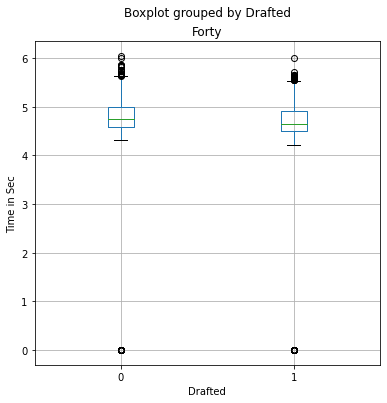

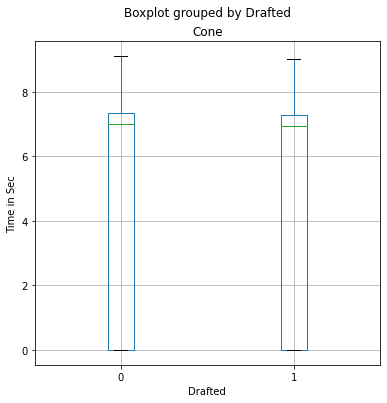

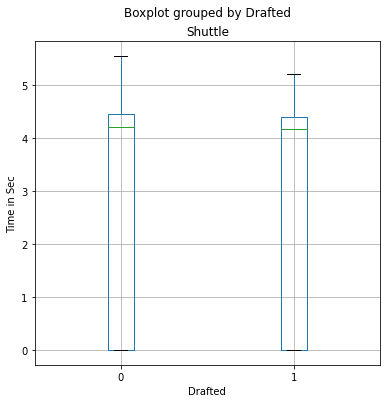

In [44]:
for col in timed:
    ax =df.boxplot(col, by='Drafted', figsize=(6,6))
    ax.set_ylabel("Time in Sec")

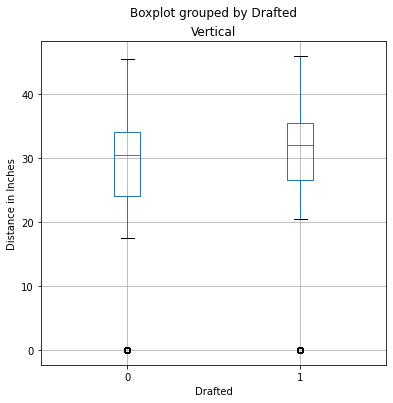

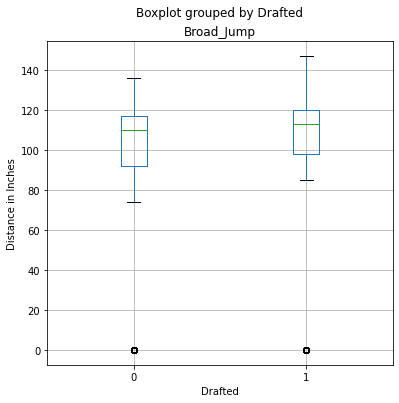

In [45]:
for col in dist:
    ax =df.boxplot(col, by='Drafted', figsize=(6,6))
    ax.set_ylabel("Distance in Inches")

Text(0, 0.5, 'Number of Repetition')

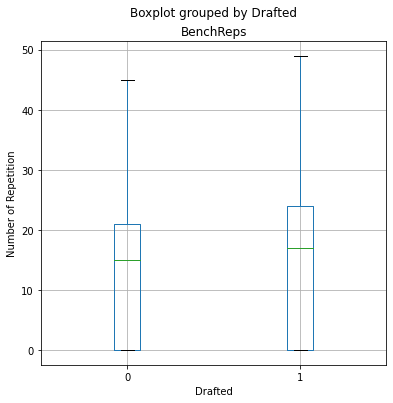

In [46]:
ax =df.boxplot('BenchReps', by='Drafted', figsize=(6,6))
ax.set_ylabel("Number of Repetition")

In [47]:
df['Pos'].value_counts()

WR     858
CB     560
RB     543
OT     457
DE     441
DT     408
OG     389
OLB    381
QB     349
TE     335
ILB    252
FS     211
SS     205
FB     126
P      109
LS      19
Name: Pos, dtype: int64

In [48]:
df.shape

(5643, 10)

In [49]:
# ANOVA
anova_skills = ols('Drafted ~ Vertical + BenchReps + Broad_Jump + Shuttle + Forty + Cone', data=df).fit()
anova_table = sm.stats.anova_lm(anova_skills, type=2)
print(anova_table)

                df       sum_sq   mean_sq          F        PR(>F)
Vertical       1.0     4.083812  4.083812  17.896892  2.368996e-05
BenchReps      1.0     7.886453  7.886453  34.561578  4.366729e-09
Broad_Jump     1.0     0.701870  0.701870   3.075875  7.951615e-02
Shuttle        1.0     2.776911  2.776911  12.169529  4.894776e-04
Forty          1.0     2.576823  2.576823  11.292665  7.833110e-04
Cone           1.0     0.095830  0.095830   0.419965  5.169809e-01
Residual    5636.0  1286.053740  0.228186        NaN           NaN


Text(0.5, 1.0, 'Correlation between Feature and being Drafted')

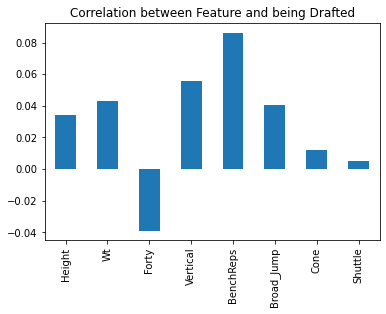

In [50]:
corr = df.corr()
draftcorr = corr['Drafted']
draftcorr1 = draftcorr.drop(index= "Drafted")
ax = draftcorr1.plot(kind = 'bar', x = draftcorr.drop(columns = ['Drafted']))
ax.set_title('Correlation between Feature and being Drafted')

In [51]:
df.columns

Index(['Pos', 'Height', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'Broad_Jump',
       'Cone', 'Shuttle', 'Drafted'],
      dtype='object')

In [52]:
draftcorr1

Height        0.034311
Wt            0.042817
Forty        -0.038828
Vertical      0.055958
BenchReps     0.086155
Broad_Jump    0.040589
Cone          0.011863
Shuttle       0.005112
Name: Drafted, dtype: float64

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


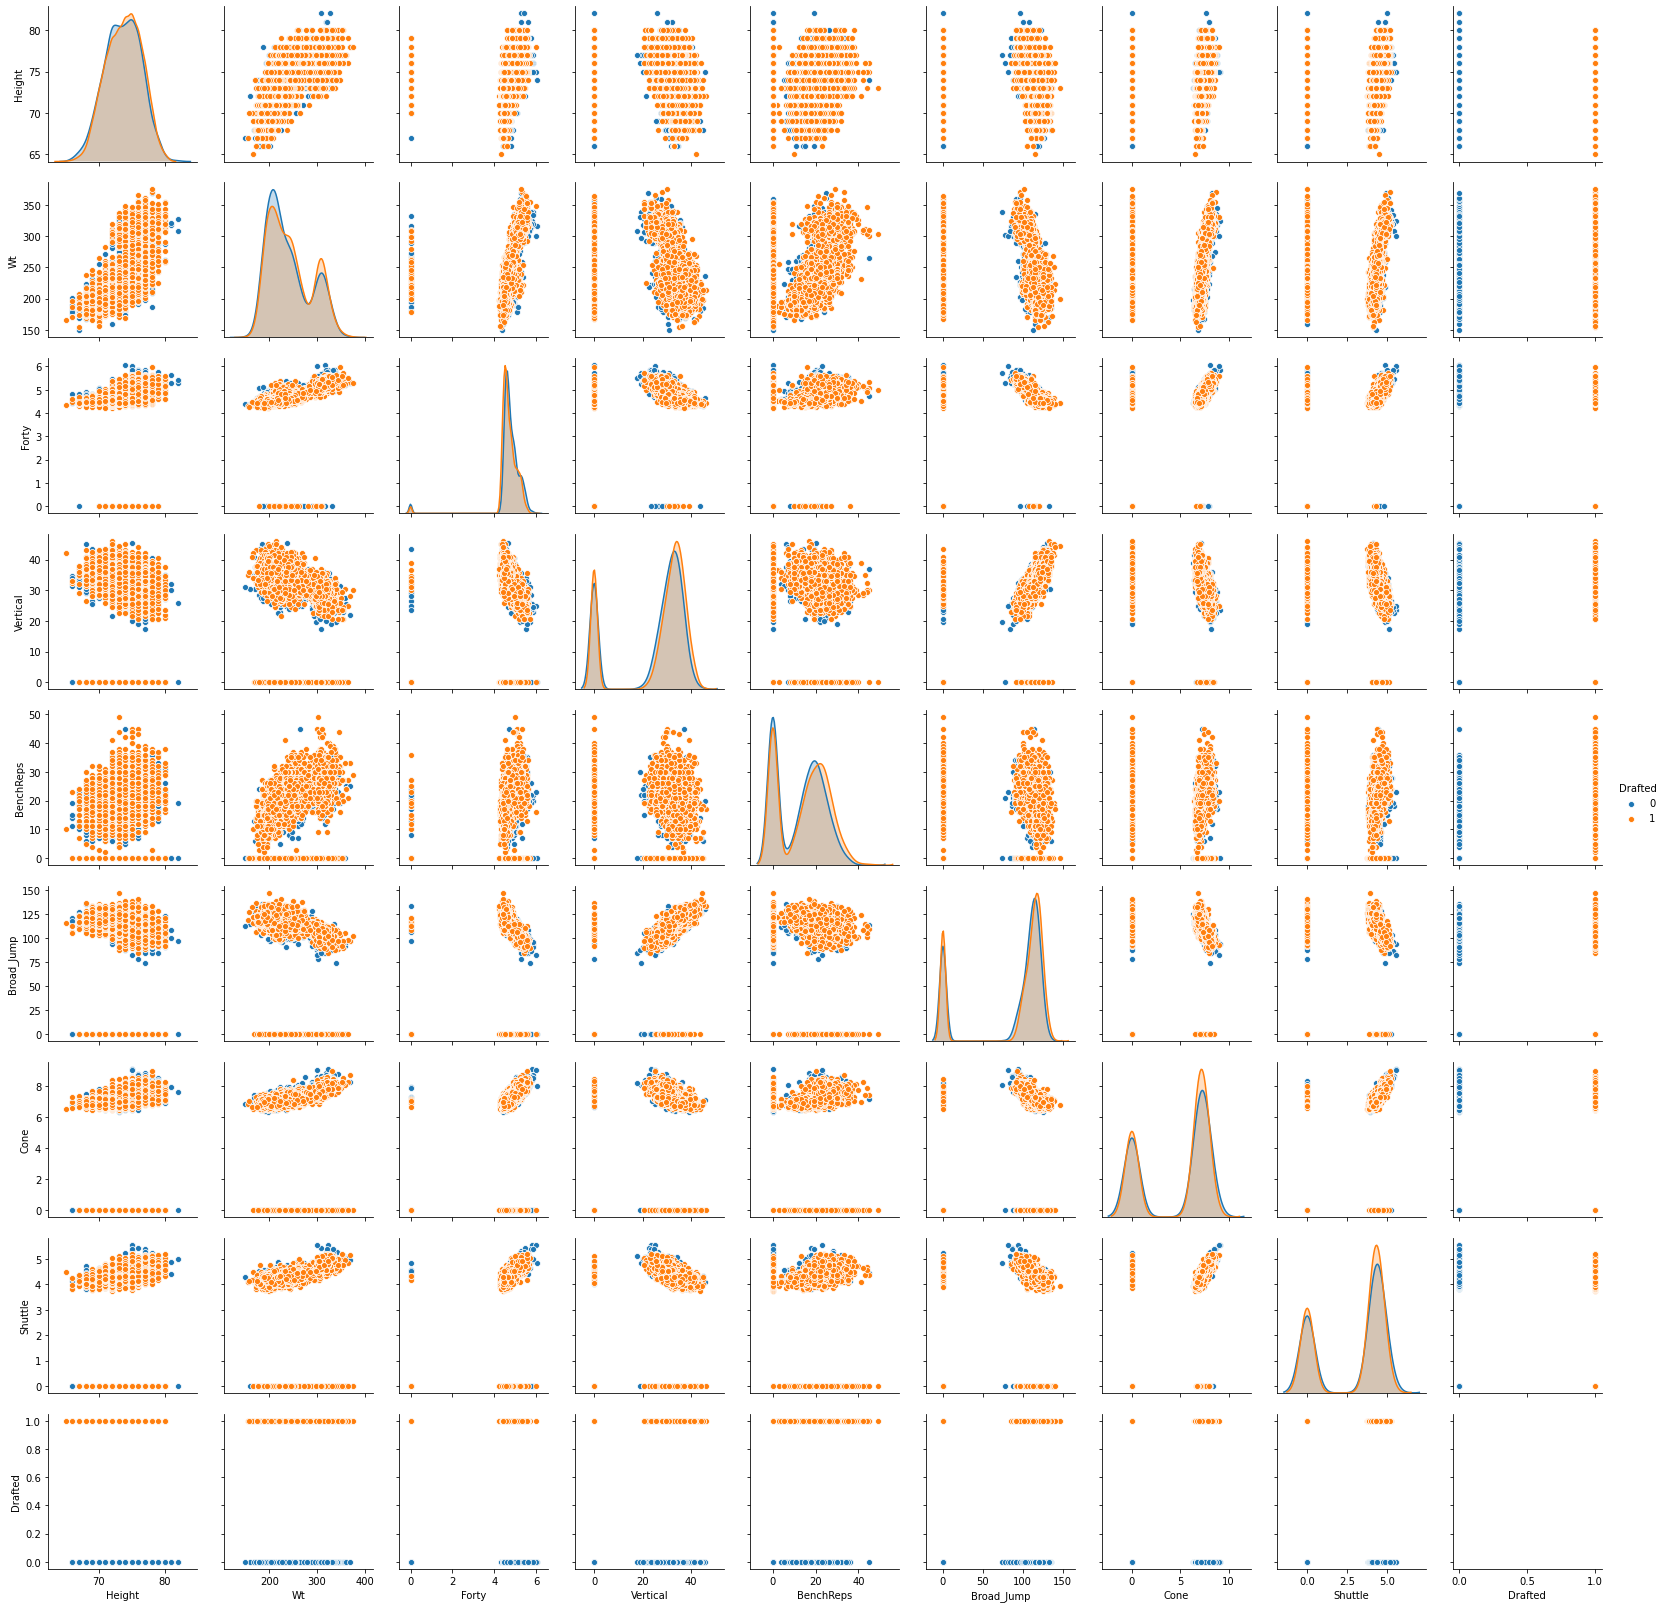

In [53]:
sns.pairplot(df, hue = 'Drafted')

In [54]:
# baseline for accuracy 

print(f"Need models to have an accuracy score greater than {round(len(df.loc[df['Drafted']==1])/len(df)*100,2)}%") 


Need models to have an accuracy score greater than 63.74%


## clean to add new data sets
new positions to add

In [55]:
df.loc[(df['Pos']=='SS') | (df['Pos']=='FS'), 'Pos']='S'
dum = 'Pos'
df =clean.dummy(df, dum)
df['Pos_EDGE'] = 0
df['Pos_LB'] = 0
df['Pos_DL'] = 0
df['Pos_OL'] = 0
df['Pos_C'] = 0

In [56]:
df.drop(['Pos_QB'], inplace = True, axis =1)
df.columns

Index(['Height', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone',
       'Shuttle', 'Drafted', 'Pos_CB', 'Pos_DE', 'Pos_DT', 'Pos_FB', 'Pos_ILB',
       'Pos_LS', 'Pos_OG', 'Pos_OLB', 'Pos_OT', 'Pos_P', 'Pos_RB', 'Pos_S',
       'Pos_TE', 'Pos_WR', 'Pos_EDGE', 'Pos_LB', 'Pos_DL', 'Pos_OL', 'Pos_C'],
      dtype='object')

# Modeling

## Train Test Split

In [9]:
tar = 'Drafted'
X_train, X_test, y_train, y_test = clean.testing_data(df, tar)

## KNN

In [24]:
minmax = MinMaxScaler()
minmax.fit(X_train)

X_trainmm = minmax.transform(X_train)
X_testmm = minmax.transform(X_test)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_trainstand = scaler.transform(X_train)
X_teststand = scaler.transform(X_test)

In [26]:
# not scaled
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6038270729978739 0.7074829931972789


In [27]:
# min max
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_trainmm, y_train)
y_pred =knn.predict(X_testmm)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6194188518781006 0.7163232963549921


In [28]:
# standardized 
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_trainstand, y_train)
y_pred =knn.predict(X_teststand)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6435152374202693 0.7530682376043202


In [29]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainstand, y_train)
    
    y_pred =knn.predict(X_teststand)
    
    test_f1 = f1_score(y_test, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7143614202437731, 0.6481371969248966, 0.7308693388859968, 0.6902356902356903, 0.7419189327860441, 0.7241379310344827, 0.7516372795969772, 0.7336842105263156, 0.7533632286995516, 0.7376543209876544, 0.7579774177712322, 0.746177370030581, 0.7530682376043202, 0.743174924165824, 0.7551219512195122, 0.7513702042850025, 0.7630057803468207]


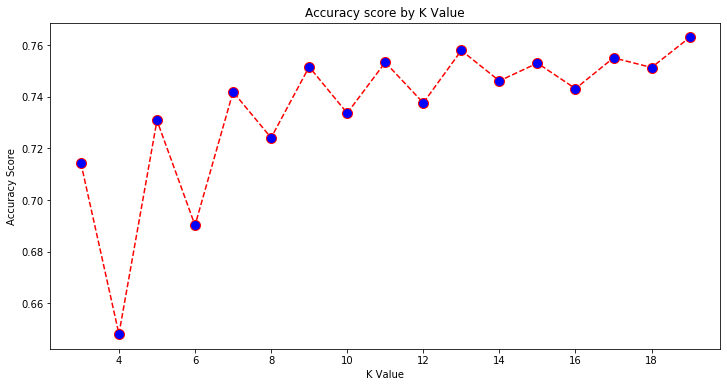

In [30]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [31]:
# best score for knn
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_trainstand, y_train)
y_pred =knn.predict(X_teststand)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6442239546420978 0.7551219512195122


## Random Forest

In [32]:
# fitted hyperparameters
clf = RandomForestClassifier( random_state=2, max_depth = 9, max_features = 3, max_leaf_nodes = 150, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
f1 = f1_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print(accuracy, f1)

0.6895818568391212 0.7994505494505495


In [102]:
clf_cv = RandomForestClassifier(random_state=2, max_depth = 9, max_features = 3, max_leaf_nodes = 150)
param_dist = { 'class_weight': ('balance', None),
    'n_estimators': (100, 80, 110),
    'min_samples_split': (8, 11, 15, 20),
    'min_samples_leaf': (3,4,5),
    'min_samples_split': (2,3,4)
    }


In [103]:
gsearchrf = GridSearchCV(
    estimator = clf_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearchrf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   21.1s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features=3,
                                              max_leaf_nodes=150,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                            

In [104]:
gsearchrf.best_params_

{'class_weight': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 110}

In [31]:
gsearchrf.best_params_

{'max_depth': 9,
 'max_features': 3,
 'max_leaf_nodes': 150,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [35]:
gsearchrf.best_score_

0.796508333043857

In [105]:
preds = gsearchrf.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.690511
F1: 0.798861


## Logistic Regression

In [33]:
logreg = LogisticRegression(random_state = 2)

logreg.fit(X_train, y_train)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred = logreg.predict(X_test)
f1 = f1_score(y_test, pred)
test_acc = accuracy_score(y_test, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.6895818568391212, f1:0.7813333333333333


In [37]:
logreg_cv = LogisticRegression(random_state=2)
param_dist = { 'class_weight': ('balance', None),
    'C': (.5, 1),
    'max_iter': (75, 100, 125)
    }


In [38]:
gsearchrf = GridSearchCV(
    estimator = logreg_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    )

gsearchrf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'C': (0.5, 1), 'class_weight': ('balance', None),
                         'max_iter': (75, 100, 125)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [39]:
gsearchrf.best_params_

{'C': 1, 'class_weight': 'balance', 'max_iter': 75}

In [41]:
preds = gsearchrf.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.651825
F1: 0.783477


##  XGBoost

In [27]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
param_dist = {
             'max_depth': (5,6,7),
             'n_estimators': (20,19, 18,21,22),
             }

In [28]:
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist,
    scoring='f1',
    verbose=1,
    iid=False,
    n_jobs = -1,
    cv=5)

gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.8s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0.7,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': (5, 6, 7),
                         'n_estimators': (20, 19, 18, 21, 22)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [29]:
gsearch1.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [35]:
preds = gsearch1.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.705839
F1: 0.800791


### Final Model

In [10]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0.7, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
preds = clf_xgb.predict(X_test)
f1= f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (acc))
print("F1: %f" % (f1))

Accuracy: 0.698795
F1: 0.799812


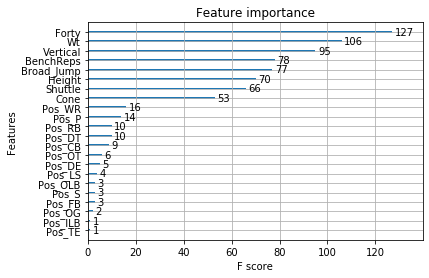

In [12]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

### 2018-2019 Combine results

In [13]:
draft1819 = ['2018_2019_combine/defense_2018.csv',
'2018_2019_combine/defense_2019.csv',
'2018_2019_combine/offense_2018.csv',
'2018_2019_combine/offense_2019.csv']

In [14]:
df2 = clean.read_and_concat(draft1819)

In [15]:
df2 = clean.clean_data(df2)

In [16]:
dum2 = 'Pos'
df2 =clean.dummy(df2, dum2)
df2['Pos_P'] = 0
df2['Pos_LS'] = 0 
df2.drop(['Pos_QB'], inplace = True, axis =1)

In [17]:
df2.drop(columns = ['Age'], inplace = True)

In [18]:
df2 = clean.rearrange_cols(df2)

# Evaluation with 2018/2019 Combine Results

In [21]:
print(f"Need models to have an accuracy score greater than {round(len(df2.loc[df2['Drafted']==1])/len(df2)*100,2)}%") 

Need models to have an accuracy score greater than 60.2%


In [19]:
X2 = df2.drop(columns = ['Drafted'])
y2 = df2['Drafted']

In [20]:
preds = clf_xgb.predict(X2)
f1= f1_score(y2, preds)
acc = accuracy_score(y2, preds)
print("Accuracy: %f" % (acc))
print("F1: %f" % (f1))

Accuracy: 0.637592
F1: 0.760746


# DF 3 with selection engineering

Height/weight ratio

In [96]:
df3 = df
df3['H/W_Ratio']= df3['Height']/df3['Wt']
df3 = df3.drop(columns = ['Height', 'Wt'])
df3.head()

,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,Drafted,Pos_DE,Pos_DT,Pos_FB,...,Pos_OG,Pos_OLB,Pos_OT,Pos_P,Pos_QB,Pos_RB,Pos_SS,Pos_TE,Pos_WR,H/W_Ratio
0,4.53,33.0,0.0,130.0,7.09,4.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.392670
1,4.91,34.0,0.0,108.0,7.71,4.59,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.327511
2,4.59,36.0,0.0,123.0,7.22,4.16,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.394444
3,5.26,29.0,28.0,97.0,7.78,4.72,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.228916
4,4.50,0.0,0.0,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.367876


In [97]:
len(df3.columns)

23

## df3 KNN

In [98]:
X3 = df3.drop(columns = ['Drafted'])
y3 = df3['Drafted']
X_train3, X_test3, y_train3,  y_test3  = train_test_split(X3, y3, random_state = 2)

In [102]:
# minmax = MinMaxScaler()
# minmax.fit(X_train3)

# X_trainmm = minmax.transform(X_train3)
# X_testmm = minmax.transform(X_test3)

# scaler = StandardScaler()
# scaler.fit(X_train3)

# X_trainstand = scaler.transform(X_train3)
# X_teststand = scaler.transform(X_test3)

# # not scaled
# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_train3, y_train3)
# y_pred =knn.predict(X_test3)
# accuracy = accuracy_score(y_test3, y_pred)
# test_f1 = f1_score(y_test3, y_pred)
# print(f"not scaled acurracy:{accuracy}, f1:{test_f1}")

# # min max
# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_trainmm, y_train3)
# y_pred =knn.predict(X_testmm)
# accuracymm = accuracy_score(y_test3, y_pred)
# test_f1mm = f1_score(y_test3, y_pred)
# print(f"min max acurracy:{accuracymm}, f1:{test_f1mm}")

# standardized 
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_trainstand, y_train3)
y_pred =knn.predict(X_teststand)
accuracys = accuracy_score(y_test3, y_pred)
test_f1s = f1_score(y_test3, y_pred)
print(f"standardized acurracy:{accuracys}, f1:{test_f1s}")

standardized acurracy:0.6435152374202693, f1:0.7528255528255529


In [100]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainstand, y_train3)
    
    y_pred =knn.predict(X_teststand)
    
    test_f1 = f1_score(y_test3, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7163232963549921, 0.6549088771310995, 0.7303896103896105, 0.694242593627725, 0.7419189327860441, 0.7274678111587983, 0.754016064257028, 0.7339642481598317, 0.754604280736685, 0.7403598971722365, 0.7579774177712322, 0.7457972491085074, 0.7528255528255529, 0.7439516129032259, 0.7546251217137294, 0.7521112767014406, 0.763094666025949]


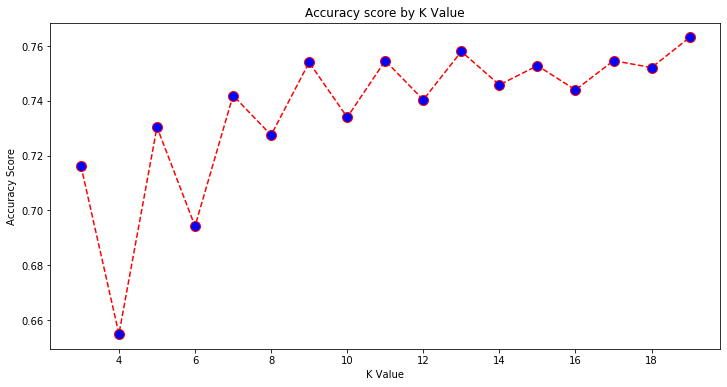

In [101]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [103]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainmm, y_train3)
    
    y_pred =knn.predict(X_testmm)
    
    test_f1 = f1_score(y_test3, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7173571054011536, 0.656140350877193, 0.7253992787223081, 0.6858407079646017, 0.7409669211195928, 0.7116827438370846, 0.7487487487487486, 0.7230046948356809, 0.743, 0.7326424870466322, 0.7589592538046145, 0.7445403758252919, 0.7591240875912408, 0.7481146304675717, 0.7601156069364161, 0.7522299306243806, 0.7614942528735631]


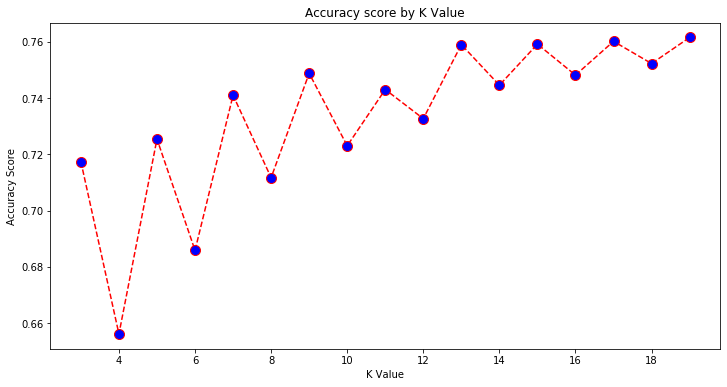

In [104]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

## df3 Random Forest

In [105]:
clf3 = RandomForestClassifier(random_state=2,)
clf.fit(X_train3, y_train3)
preds = clf.predict(X_test3)
f1 = f1_score(y_test3, preds)
accuracy = accuracy_score(y_test, preds)
print(accuracy, f1)

0.6824946846208363 0.7944954128440367


In [131]:
clf_cv = RandomForestClassifier(random_state=2, max_depth = 7, min_samples_leaf = 3, min_samples_split = 2, max_features = 4)
param_dist = {
    'n_estimators': (450, 500, 550),
    'max_leaf_nodes': (45,50,55)}

In [132]:
gsearchrf = GridSearchCV(
    estimator = clf_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearchrf.fit(X_train3, y_train3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.3s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                           

In [129]:
gsearchrf.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 600}

In [133]:
gsearchrf.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 550}

In [134]:
preds = gsearchrf.best_estimator_.predict(X_test3)
test_f1 = f1_score(y_test3, preds)
test_acc = accuracy_score(y_test3, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.672263
F1: 0.791066


## DF3 Logistic

In [106]:
logreg = LogisticRegression(random_state = 2, solver = 'liblinear')

logreg.fit(X_train3, y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
pred = logreg.predict(X_test3)
f1 = f1_score(y_test3, pred)
test_acc = accuracy_score(y_test3, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.6824946846208363, f1:0.784261715296198


## DF3 XGBoost

In [108]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
clf_xgb.fit(X_train3, y_train3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0.7, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
pred = clf_xgb.predict(X_test3)
f1 = f1_score(y_test3, pred)
test_acc = accuracy_score(y_test3, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.6824946846208363, f1:0.7908709827666512
